In [1]:
from config1 import api_key
from googleapiclient.discovery import build
import pandas as pd
import json
import requests
import datetime
from pprint import pprint
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
import scipy.stats as st
from scipy.stats import linregress
from scipy.stats import pearsonr

In [2]:
df = pd.read_csv("../US_youtube_trending_data.csv")
print(f"The standard deviation of all video's view count is: {round(df['view_count'].std(),2)}")
df.head()


The standard deviation of all video's view count is: 9794087.11


,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...


In [3]:
import json
with open("US_category_id.json") as f: categoryID = json.load(f)
categoryID, l_c = categoryID['items'], len(categoryID['items'])
ID_to_Category = dict(zip([int(categoryID[i]['id']) for i in range(l_c)],
                          [categoryID[i]['snippet']['title'] for i in range(l_c)]))

In [4]:
category_list = []
for id_ in df.categoryId:
    category_list.append(ID_to_Category[id_])
category = pd.Series(category_list)
category
df["category"] = category

In [5]:
categories1 = df.category.value_counts()
categories1

category
Entertainment            53934
Gaming                   53242
Music                    43398
Sports                   31327
People & Blogs           22653
Comedy                   13183
Film & Animation         10923
News & Politics           9669
Science & Technology      8156
Howto & Style             7100
Education                 6655
Autos & Vehicles          5492
Travel & Events           1713
Pets & Animals            1222
Nonprofits & Activism      120
Name: count, dtype: int64

In [6]:
youtube = build('youtube','v3',developerKey=api_key)

In [7]:
request = youtube.videoCategories().list(
        part="snippet",
        regionCode="US")
response = request.execute()
pprint(response)

{'etag': 'QteLrrS_X7rM7rlcU_e7qa0embQ',
 'items': [{'etag': 'grPOPYEUUZN3ltuDUGEWlrTR90U',
            'id': '1',
            'kind': 'youtube#videoCategory',
            'snippet': {'assignable': True,
                        'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
                        'title': 'Film & Animation'}},
           {'etag': 'Q0xgUf8BFM8rW3W0R9wNq809xyA',
            'id': '2',
            'kind': 'youtube#videoCategory',
            'snippet': {'assignable': True,
                        'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
                        'title': 'Autos & Vehicles'}},
           {'etag': 'qnpwjh5QlWM5hrnZCvHisquztC4',
            'id': '10',
            'kind': 'youtube#videoCategory',
            'snippet': {'assignable': True,
                        'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
                        'title': 'Music'}},
           {'etag': 'HyFIixS5BZaoBdkQdLzPdoXWipg',
            'id': '15',
            'kind': 'youtube#videoCategory',
 

In [8]:
category_number = []
categories = []
x = 0
for item in response["items"]:
    category_number.append(response["items"][x]["id"])
    categories.append(response["items"][x]["snippet"]["title"])
    x = x + 1
    

category_index = {}
for key in category_number:
    for value in categories:
        category_index[key] = value
        categories.remove(value)
        break
category_index.pop("18")
category_number.remove("18")
category_index.pop("19")
category_number.remove("19")
category_index.pop("21")
category_number.remove("21")
category_index.pop("27")
category_number.remove("27")
category_index.pop("30")
category_number.remove("30")
category_index.pop("31")
category_number.remove("31")
category_index.pop("32")
category_number.remove("32")
category_number.remove("33")
category_index.pop("33")
category_number.remove("34")
category_index.pop("34")
category_number.remove("35")
category_index.pop("35")
category_number.remove("36")
category_index.pop("36")
category_number.remove("37")
category_index.pop("37")
category_number.remove("38")
category_index.pop("38")
category_number.remove("39")
category_index.pop("39")
category_number.remove("40")
category_index.pop("40")
category_number.remove("41")
category_index.pop("41")
category_number.remove("42")
category_index.pop("42")
category_number.remove("43")
category_index.pop("43")
category_number.remove("44")
category_index.pop("44")
print(category_index)

x = 0

print(category_number)

{'1': 'Film & Animation', '2': 'Autos & Vehicles', '10': 'Music', '15': 'Pets & Animals', '17': 'Sports', '20': 'Gaming', '22': 'People & Blogs', '23': 'Comedy', '24': 'Entertainment', '25': 'News & Politics', '26': 'Howto & Style', '28': 'Science & Technology', '29': 'Nonprofits & Activism'}
['1', '2', '10', '15', '17', '20', '22', '23', '24', '25', '26', '28', '29']


In [9]:
index_df = pd.DataFrame({"Genre":category_index},index = category_number)
index_df["Index"] = category_number
index_numbers_df = index_df["Index"]

In [10]:
likes = {}
views = {}
for row in index_df["Genre"]:
    likes[row] = []   
    views[row] = []

In [11]:
n = 0
x = 0
y = 0
for row in index_df["Genre"]:
    request = youtube.videos().list(
        part="statistics",
        chart="mostPopular",
        regionCode="US",
        videoCategoryId=index_numbers_df.iloc[n]
        )
    response = request.execute()
    for item in response["items"]:
        try:
            likes[(index_df["Genre"].iloc[y])].append(response["items"][x]["statistics"]["likeCount"])
            views[(index_df["Genre"].iloc[y])].append(response["items"][x]["statistics"]["viewCount"])
            x = x + 1
        except KeyError:
            likes[(index_df["Genre"].iloc[y])].append("0")
            views[(index_df["Genre"].iloc[y])].append(response["items"][x]["statistics"]["viewCount"])
            x = x + 1
    y = y + 1
    x = 0
    n = n + 1
print(likes)
print(views)

{'Film & Animation': ['546594', '569155', '549772', '480749', '596589'], 'Autos & Vehicles': ['2517915', '1678767', '1393421', '1928603', '673829'], 'Music': ['480550', '631656', '155859', '35225', '40386'], 'Pets & Animals': ['1308928', '988117', '223845', '1125655', '674343'], 'Sports': ['188917', '891781', '55156', '1487152', '424961'], 'Gaming': ['150207', '190765', '25324', '15564', '25041'], 'People & Blogs': ['31033', '21982', '15167', '14334', '21284'], 'Comedy': ['569155', '549772', '480749', '411918', '596589'], 'Entertainment': ['305097', '673275', '382934', '2981074', '569155'], 'News & Politics': ['1969084', '70906', '711424', '106936', '101497'], 'Howto & Style': ['1463616', '1409708', '1097603', '1147619', '2517980'], 'Science & Technology': ['167524', '129896', '111461', '604319', '0'], 'Nonprofits & Activism': ['21871', '21489', '484', '2300', '803914']}
{'Film & Animation': ['8900567', '9307266', '8242974', '15796778', '12521843'], 'Autos & Vehicles': ['128022346', '3

In [12]:
views["Nonprofits & Activism"].append("0")
likes["Nonprofits & Activism"].append("0")
print(views["Nonprofits & Activism"])

['258148', '970150', '18441', '129221', '18293289', '0']


In [13]:
views0 = [elem[0] for elem in views.values()]
views1 = [elem[1] for elem in views.values()]
views2 = [elem[2] for elem in views.values()]
views3 = [elem[3] for elem in views.values()]
views4 = [elem[4] for elem in views.values()]

likes0 = [elem[0] for elem in likes.values()]
likes1 = [elem[1] for elem in likes.values()]
likes2 = [elem[2] for elem in likes.values()]
likes3 = [elem[3] for elem in likes.values()]
likes4 = [elem[4] for elem in likes.values()]

In [14]:
views_per_genre_df = pd.DataFrame({"Genre":views.keys(),"Views0":views0,"Views1":views1,"Views2":views2,"Views3":views3,"Views4":views4})
likes_per_genre_df = pd.DataFrame({"Genre":views.keys(),"Likes0":likes0,"Likes1":likes1,"Likes2":likes2,"Likes3":likes3,"Likes4":likes4})
views_per_genre_df['Views0'] = views_per_genre_df['Views0'].astype(float)
views_per_genre_df['Views1'] = views_per_genre_df['Views1'].astype(float)
views_per_genre_df['Views2'] = views_per_genre_df['Views2'].astype(float)
views_per_genre_df['Views3'] = views_per_genre_df['Views3'].astype(float)
views_per_genre_df['Views4'] = views_per_genre_df['Views4'].astype(float)
likes_per_genre_df['Likes0'] = likes_per_genre_df['Likes0'].astype(float)
likes_per_genre_df['Likes1'] = likes_per_genre_df['Likes1'].astype(float)
likes_per_genre_df['Likes2'] = likes_per_genre_df['Likes2'].astype(float)
likes_per_genre_df['Likes3'] = likes_per_genre_df['Likes3'].astype(float)
likes_per_genre_df['Likes4'] = likes_per_genre_df['Likes4'].astype(float)
views_per_genre_df

,Genre,Views0,Views1,Views2,Views3,Views4
0,Film & Animation,8900567.0,9307266.0,8242974.0,15796778.0,12521843.0
1,Autos & Vehicles,128022346.0,32683022.0,24594341.0,46045206.0,11572047.0
2,Music,6278928.0,12448625.0,3985163.0,651300.0,607587.0
3,Pets & Animals,37688631.0,9950384.0,4172719.0,17414678.0,11312674.0
4,Sports,4869121.0,20944185.0,3157127.0,30765077.0,3331949.0
5,Gaming,3134731.0,2937717.0,482889.0,412604.0,1345578.0
6,People & Blogs,531064.0,627990.0,792387.0,199930.0,194836.0
7,Comedy,9307266.0,8242974.0,15796778.0,14853822.0,12521843.0
8,Entertainment,5476350.0,10479468.0,5807888.0,52517505.0,9307266.0
9,News & Politics,33367739.0,2126714.0,8904944.0,3627691.0,2289238.0


In [15]:
merged_data_df = views_per_genre_df.merge(likes_per_genre_df, how = "right", on = "Genre")
merged_data_df['Total_Views'] = merged_data_df.filter(like='Views').sum(axis=1)
merged_data_df['Total_Likes'] = merged_data_df.filter(like='Likes').sum(axis=1)
merged_data_df

,Genre,Views0,Views1,Views2,Views3,Views4,Likes0,Likes1,Likes2,Likes3,Likes4,Total_Views,Total_Likes
0,Film & Animation,8900567.0,9307266.0,8242974.0,15796778.0,12521843.0,546594.0,569155.0,549772.0,480749.0,596589.0,54769428.0,2742859.0
1,Autos & Vehicles,128022346.0,32683022.0,24594341.0,46045206.0,11572047.0,2517915.0,1678767.0,1393421.0,1928603.0,673829.0,242916962.0,8192535.0
2,Music,6278928.0,12448625.0,3985163.0,651300.0,607587.0,480550.0,631656.0,155859.0,35225.0,40386.0,23971603.0,1343676.0
3,Pets & Animals,37688631.0,9950384.0,4172719.0,17414678.0,11312674.0,1308928.0,988117.0,223845.0,1125655.0,674343.0,80539086.0,4320888.0
4,Sports,4869121.0,20944185.0,3157127.0,30765077.0,3331949.0,188917.0,891781.0,55156.0,1487152.0,424961.0,63067459.0,3047967.0
5,Gaming,3134731.0,2937717.0,482889.0,412604.0,1345578.0,150207.0,190765.0,25324.0,15564.0,25041.0,8313519.0,406901.0
6,People & Blogs,531064.0,627990.0,792387.0,199930.0,194836.0,31033.0,21982.0,15167.0,14334.0,21284.0,2346207.0,103800.0
7,Comedy,9307266.0,8242974.0,15796778.0,14853822.0,12521843.0,569155.0,549772.0,480749.0,411918.0,596589.0,60722683.0,2608183.0
8,Entertainment,5476350.0,10479468.0,5807888.0,52517505.0,9307266.0,305097.0,673275.0,382934.0,2981074.0,569155.0,83588477.0,4911535.0
9,News & Politics,33367739.0,2126714.0,8904944.0,3627691.0,2289238.0,1969084.0,70906.0,711424.0,106936.0,101497.0,50316326.0,2959847.0


In [16]:
merged_data_df['view_to_like_ratio'] = merged_data_df['Total_Likes'] / merged_data_df['Total_Views']

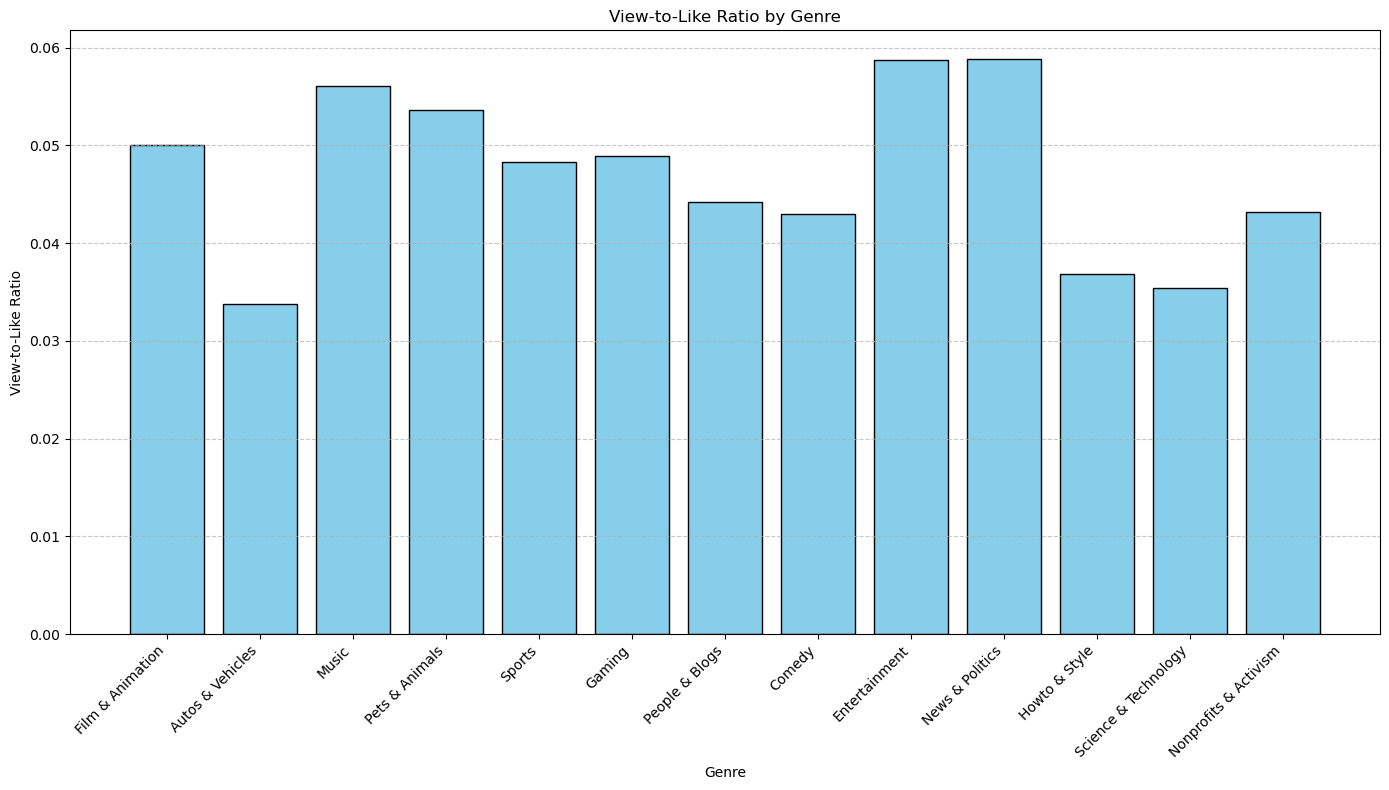

In [17]:
plt.figure(figsize=(14, 8))
plt.bar(merged_data_df['Genre'], merged_data_df['view_to_like_ratio'], color='skyblue', edgecolor='black')
plt.title('View-to-Like Ratio by Genre')
plt.xlabel('Genre')
plt.ylabel('View-to-Like Ratio')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

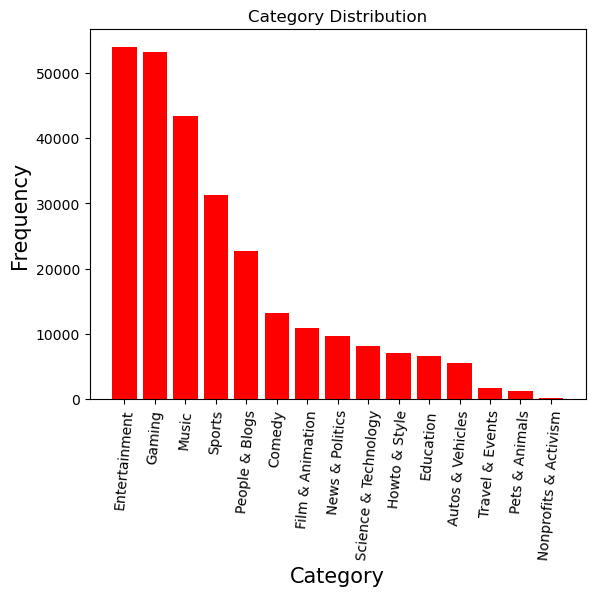

In [18]:
plt.bar(categories1.index,categories1.values,color = "red")
plt.xticks(rotation = 85)
plt.title("Category Distribution")
plt.xlabel("Category",size = 15)
plt.ylabel("Frequency",size = 15)
plt.show()

In [19]:
views_per_genre_df = views_per_genre_df.drop('Genre', axis=1)
likes_per_genre_df = likes_per_genre_df.drop('Genre', axis=1)

likes_sum = {}
views_sum = {}
y = 0
for row in index_df["Genre"]:
    likes_sum[row] = []   
    views_sum[row] = []

for row in index_df["Genre"]:
    views_sum[(index_df["Genre"].iloc[y])].append(views_per_genre_df.iloc[y].sum(axis=0))
    likes_sum[(index_df["Genre"].iloc[y])].append(likes_per_genre_df.iloc[y].sum(axis=0))
    y = y + 1



In [20]:
vals = list(views_sum.values())
views_sum1 = [ x[0] for x in vals ]
vals1 = list(likes_sum.values())
likes_sum1 = [ x[0] for x in vals1 ]
print(likes_sum1)


[2742859.0, 8192535.0, 1343676.0, 4320888.0, 3047967.0, 406901.0, 103800.0, 2608183.0, 4911535.0, 2959847.0, 7636526.0, 1013200.0, 850058.0]


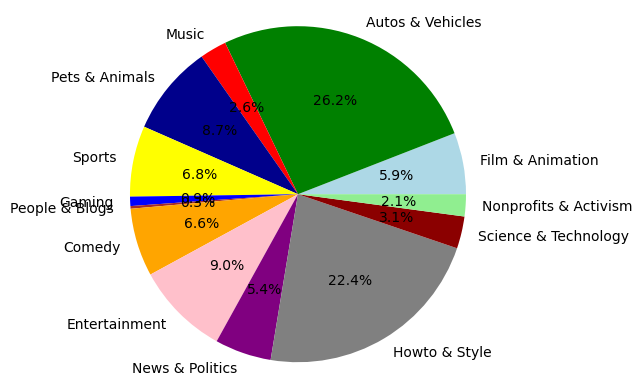

In [21]:
labels = list(views_sum.keys())
color = ['lightblue', 'green', 'red', 'darkblue', 'yellow', 'blue', 'brown', 'orange', 'pink', 'purple', 'gray', 'darkred', 'lightgreen']
# Plot
plt.pie(views_sum1, labels=labels,autopct="%1.1f%%",colors=color)

plt.axis('equal')
plt.show()

In [22]:
views_sum_df = pd.DataFrame({"Genre":views.keys(),"Views Sum":views_sum1})
views_sum_df["Views Average"] = views_sum_df["Views Sum"] / 5
views_sum_df

,Genre,Views Sum,Views Average
0,Film & Animation,54769428.0,10953885.6
1,Autos & Vehicles,242916962.0,48583392.4
2,Music,23971603.0,4794320.6
3,Pets & Animals,80539086.0,16107817.2
4,Sports,63067459.0,12613491.8
5,Gaming,8313519.0,1662703.8
6,People & Blogs,2346207.0,469241.4
7,Comedy,60722683.0,12144536.6
8,Entertainment,83588477.0,16717695.4
9,News & Politics,50316326.0,10063265.2


In [23]:
likes_sum_df = pd.DataFrame({"Genre":views.keys(),"Likes Sum":likes_sum1})
likes_sum_df["Likes Average"] = likes_sum_df["Likes Sum"] / 5
likes_sum_df

,Genre,Likes Sum,Likes Average
0,Film & Animation,2742859.0,548571.8
1,Autos & Vehicles,8192535.0,1638507.0
2,Music,1343676.0,268735.2
3,Pets & Animals,4320888.0,864177.6
4,Sports,3047967.0,609593.4
5,Gaming,406901.0,81380.2
6,People & Blogs,103800.0,20760.0
7,Comedy,2608183.0,521636.6
8,Entertainment,4911535.0,982307.0
9,News & Politics,2959847.0,591969.4


The correlation between both factors is 0.52


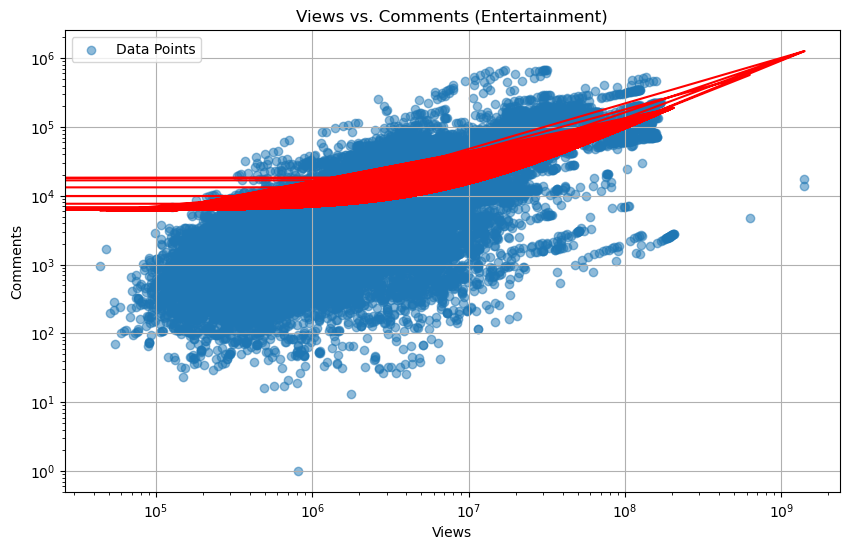

In [24]:
entertainment_data = df[df['category'] == 'Entertainment']
entertainment_data = entertainment_data.dropna(subset=['view_count', 'comment_count'])
entertainment_data['view_count'] = pd.to_numeric(entertainment_data['view_count'])
entertainment_data['comment_count'] = pd.to_numeric(entertainment_data['comment_count'])
entertainment_vc = entertainment_data.iloc[:,8]
entertainment_cc = entertainment_data.iloc[:,11]
correlation = st.pearsonr(entertainment_vc,entertainment_cc)
print(f"The correlation between both factors is {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(entertainment_vc, entertainment_cc)
regress_values = entertainment_vc * slope + intercept
plt.figure(figsize=(10, 6))
plt.scatter(entertainment_data['view_count'], entertainment_data['comment_count'], alpha=0.5, label='Data Points')
plt.plot(entertainment_vc,regress_values,"r-")
plt.title('Views vs. Comments (Entertainment)')
plt.xlabel('Views')
plt.ylabel('Comments')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.legend()
plt.show()

In [25]:
entertainment_data

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,category
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...,Entertainment
5,w-aidBdvZo8,I Haven't Been Honest About My Injury.. Here's...,2020-08-11T20:00:04Z,UC5zJwsFtEs9WYe3A76p7xIA,Professor Live,24,2020-08-12T00:00:00Z,Professor injury|professor achilles|professor ...,949491,77487,746,7506,https://i.ytimg.com/vi/w-aidBdvZo8/default.jpg,False,False,Subscribe To My Channel - https://www.youtube....,Entertainment
8,SnsPZj91R7E,SURPRISING MY DAD WITH HIS DREAM TRUCK!! | Lou...,2020-08-10T22:26:59Z,UCZDdF_p-L88NWVpzF0vjvMQ,Louie's Life,24,2020-08-12T00:00:00Z,surprising|dad|father|papa|with|dream|car|truc...,1402687,95694,2158,6613,https://i.ytimg.com/vi/SnsPZj91R7E/default.jpg,False,False,"Since I was little, i've had these goals for m...",Entertainment
16,6TIsR_7nrNc,Kylie Jenner Reacts To 'WAP' Music Video Backlash,2020-08-10T18:41:19Z,UC2rJLq19N0dGrxfib80M_fg,HollywoodLife,24,2020-08-12T00:00:00Z,kylie jenner|kendall jenner|cardi b|wap|reacts...,1007540,10102,7932,2763,https://i.ytimg.com/vi/6TIsR_7nrNc/default.jpg,False,False,Kylie Jenner dissed over cameo in Cardi B and ...,Entertainment
22,FopIxceEr8g,EXTREME Game of Hide and Seek in my NEW HOUSE!!,2020-08-10T17:09:53Z,UCilwZiBBfI9X6yiZRzWty8Q,FaZe Rug,24,2020-08-12T00:00:00Z,faze rug|rug|rugfaze|fazerug|hide n seek|hide ...,3061467,206840,2646,14934,https://i.ytimg.com/vi/FopIxceEr8g/default.jpg,False,False,THIS WAS SO MUCH FUNWe played hide n seek for ...,Entertainment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268765,mKdjycj-7eE,"Stop This Train, Win a Lamborghini",2024-03-16T16:00:00Z,UCX6OQ3DkcsbYNE6H8uQQuVA,MrBeast,24,2024-04-15T00:00:00Z,[None],117249490,4309093,0,127492,https://i.ytimg.com/vi/mKdjycj-7eE/default.jpg,False,False,I still can’t believe what happened in this vi...,Entertainment
268781,d7DdLRe5QgM,skibidi toilet 72 (full episode),2024-04-05T06:30:18Z,UCsSsgPaZ2GSmO6il8Cb5iGA,DaFuq!?Boom!,24,2024-04-15T00:00:00Z,sfm animation|skibidi toilet vs cameramen|skib...,23820264,720335,0,33664,https://i.ytimg.com/vi/d7DdLRe5QgM/default.jpg,False,False,"g-toilet, astro toilets and titans clash in co...",Entertainment
268783,aFsfJYWpqII,Food Delivery Apps: Last Week Tonight with Joh...,2024-04-04T11:00:02Z,UC3XTzVzaHQEd30rQbuvCtTQ,LastWeekTonight,24,2024-04-15T00:00:00Z,[None],3998181,107811,0,10335,https://i.ytimg.com/vi/aFsfJYWpqII/default.jpg,False,False,"John Oliver discusses food delivery apps, how ...",Entertainment
268784,pRAsQss17xs,12 Things NO-ONE Tells You About Japan | Feat....,2024-04-07T14:53:25Z,UCHL9bfHTxCMi-7vfxQ-AYtg,Abroad in Japan,24,2024-04-15T00:00:00Z,japan|cdawgva|abroad in japan|trash taste,873960,41941,0,1918,https://i.ytimg.com/vi/pRAsQss17xs/default.jpg,False,False,We reveal 12 things no-one tells you to expect...,Entertainment


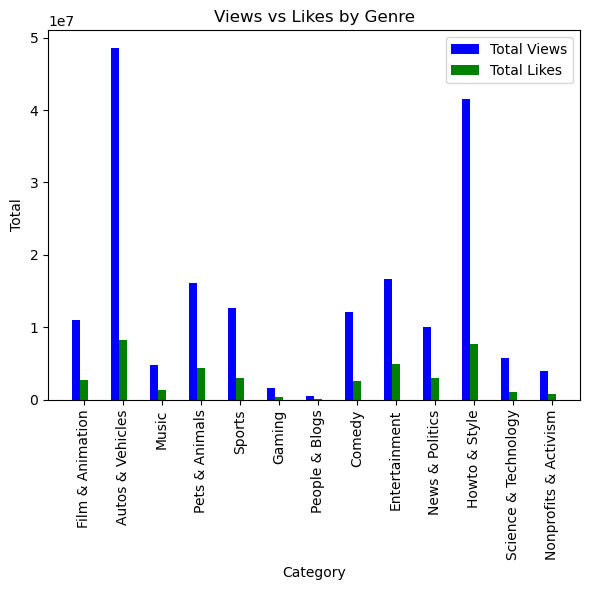

In [26]:
x = range(len(views_sum_df["Genre"]))
    
plt.figure(figsize=(6, 6))

plt.bar(x, views_sum_df["Views Average"], width=0.2, label='Total Views', color='blue', align='center')
plt.bar([p + 0.2 for p in x], likes_sum_df["Likes Sum"], width=0.2, label='Total Likes', color='green', align='center')
plt.xticks(rotation=90)
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Total')
plt.title('Views vs Likes by Genre')
plt.xticks([p + 0.2 for p in x], likes_sum_df["Genre"])
plt.legend()
plt.tight_layout()
plt.show()

In [27]:
# Get video categories
def get_video_categories(region_code="US"):
    request = youtube.videoCategories().list(
        part="snippet",
        regionCode=region_code
    )
    response = request.execute()
    return response["items"]

# Fetch video statistics by category
def fetch_category_statistics(category_id):
    request = youtube.videos().list(
        part="statistics",
        chart="mostPopular",
        videoCategoryId=category_id,
        maxResults=10 
    )
    response = request.execute()
    statistics = []
    for item in response['items']:
        stats = {
            'videoId': item['id'],
            'views': int(item['statistics'].get('viewCount', 0)),
            'likes': int(item['statistics'].get('likeCount', 0)),
            'comments': int(item['statistics'].get('commentCount', 0)),
        }
        statistics.append(stats)
    return statistics

# Sort statistics 
def sort_statistics(statistics, key):
    return sorted(statistics, key=lambda x: x[key], reverse=True)

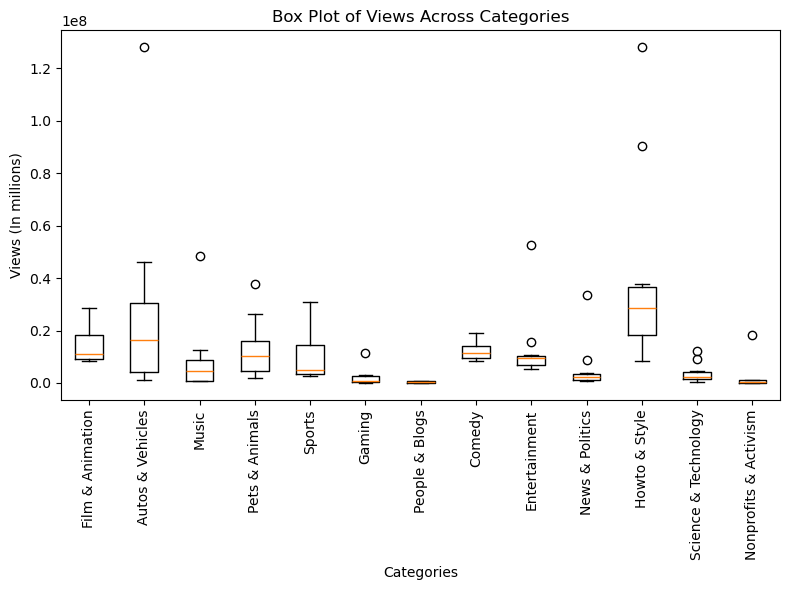

In [28]:
# Main function to fetch, aggregate, and plot box plots
def main():
    # Get categories from the YouTube API
    categories_response = get_video_categories()
    
    # Extract category ID and title
    category_number = [item["id"] for item in categories_response]
    categories = [item["snippet"]["title"] for item in categories_response]
    
    # Create category_index dictionary with all categories
    category_index = dict(zip(category_number, categories))
    
    # List of categories to exclude
    excluded_categories = {"18", "19", "21", "27", "30", "31", "32", "33", "34", "35", "36", "37", "38", "39", "40", "41", "42", "43", "44"}
    
    # Filter out excluded categories
    category_index = {key: value for key, value in category_index.items() if key not in excluded_categories}
    
    # Prepare data for box plots
    category_views = {}

    for category_id, category_name in category_index.items():
        stats = fetch_category_statistics(category_id)
        
        # Collect views data
        views = [stat['views'] for stat in stats]
        
        # Store views data by category
        category_views[category_name] = views
    
    # Prepare data for box plot
    data_to_plot = [category_views[cat] for cat in category_index.values()]
    labels = list(category_index.values())
    
    # Plot box plots
    plt.figure(figsize=(8, 6))

    plt.boxplot(data_to_plot, labels=labels)

    plt.title('Box Plot of Views Across Categories')
    plt.xlabel('Categories')
    plt.ylabel('Views (In millions)')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()
if __name__ == "__main__":
    main()

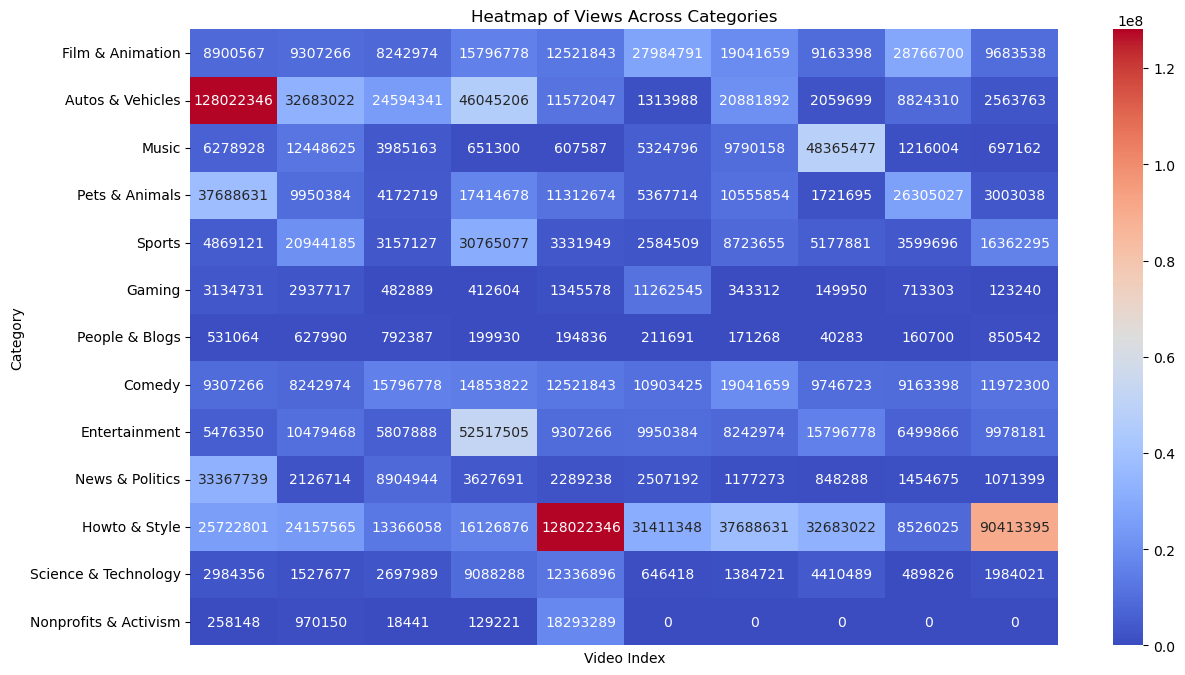

In [29]:
def fetch_category_statistics(category_id):
    request = youtube.videos().list(
        part="statistics",
        chart="mostPopular",
        videoCategoryId=category_id,
        maxResults=10  
    )
    response = request.execute()
    views = [int(item['statistics'].get('viewCount', 0)) for item in response['items']]
    return views

# Main function to fetch, aggregate, and plot a heatmap
def main():
    # Get categories from the YouTube API
    categories_response = get_video_categories()
    
    # Extract category ID and title
    category_number = [item["id"] for item in categories_response]
    categories = [item["snippet"]["title"] for item in categories_response]
    
    # Create category_index dictionary with all categories
    category_index = dict(zip(category_number, categories))
    
    # List of categories to exclude
    excluded_categories = {"18", "19", "21", "27", "30", "31", "32", "33", "34", "35", "36", "37", "38", "39", "40", "41", "42", "43", "44"}
    
    # Filter out excluded categories
    category_index = {key: value for key, value in category_index.items() if key not in excluded_categories}
    
    # Prepare data for the heatmap
    views_data = []

    max_videos = 0

    for category_id, category_name in category_index.items():
        views = fetch_category_statistics(category_id)
        views_data.append(views)
        max_videos = max(max_videos, len(views))

    # Pad lists with zeros to make them the same length
    for i in range(len(views_data)):
        views_data[i] += [0] * (max_videos - len(views_data[i]))

    # Convert views_data to a numpy array
    views_array = np.array(views_data)
    
    # Create a heatmap
    plt.figure(figsize=(14, 8))
    sns.heatmap(views_array, annot=True, fmt='d', cmap='coolwarm', xticklabels=False, yticklabels=list(category_index.values()))

    plt.title('Heatmap of Views Across Categories')
    plt.xlabel('Video Index')
    plt.ylabel('Category')
    plt.show()

if __name__ == "__main__":
    main()